### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [ ]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

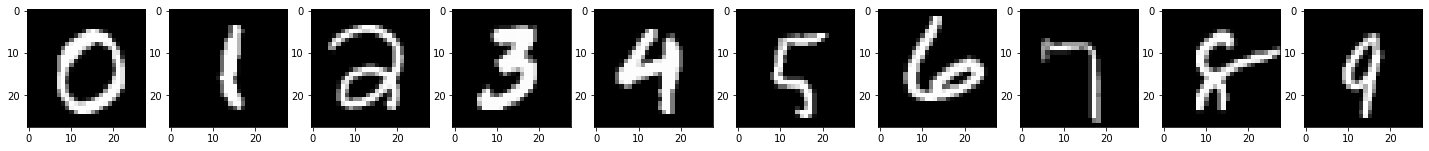

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

In [ ]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


Epoch 1/15
469/469 [==============================] - 28s 46ms/step - loss: 0.3365 - accuracy: 0.8968 - val_loss: 0.3128 - val_accuracy: 0.9004
Epoch 2/15
469/469 [==============================] - 22s 46ms/step - loss: 0.1302 - accuracy: 0.9597 - val_loss: 0.0440 - val_accuracy: 0.9851
Epoch 3/15
469/469 [==============================] - 21s 45ms/step - loss: 0.0984 - accuracy: 0.9705 - val_loss: 0.0332 - val_accuracy: 0.9895
Epoch 4/15
469/469 [==============================] - 21s 46ms/step - loss: 0.0829 - accuracy: 0.9754 - val_loss: 0.0687 - val_accuracy: 0.9782
Epoch 5/15
469/469 [==============================] - 21s 45ms/step - loss: 0.0717 - accuracy: 0.9776 - val_loss: 0.0428 - val_accuracy: 0.9864
Epoch 6/15
469/469 [==============================] - 20s 43ms/step - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.0262 - val_accuracy: 0.9915
Epoch 7/15
469/469 [==============================] - 22s 47ms/step - loss: 0.0598 - accuracy: 0.9811 - val_loss: 0.0240 - val_accuracy:

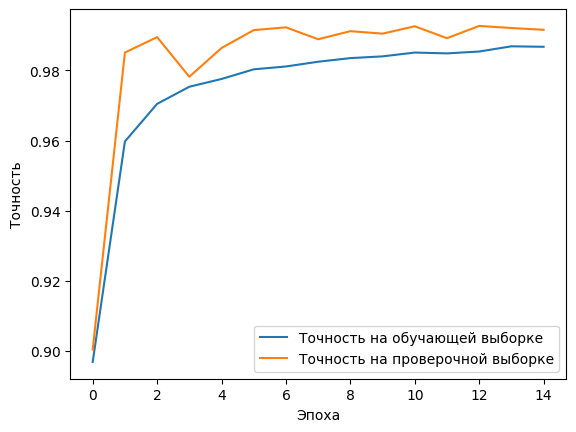

In [ ]:
# Ваше решение

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=15, validation_data=(x_test, y_test), verbose=1)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()